<a href="https://colab.research.google.com/github/Margekoorep/wotech/blob/main/Titanic_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the data from SCV file and exploring the data

In [26]:
titanic_df = pd.read_csv('/content/train.csv')
titanic_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


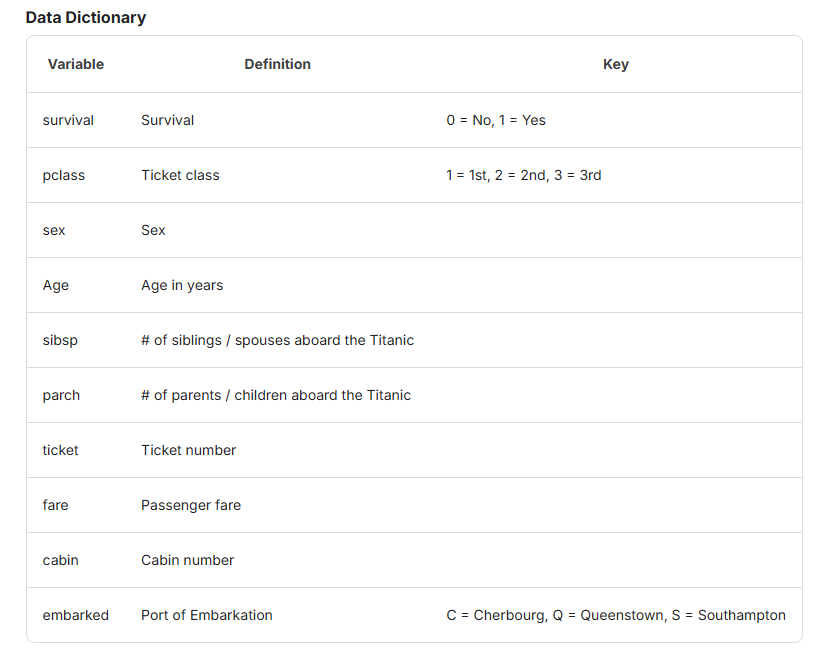

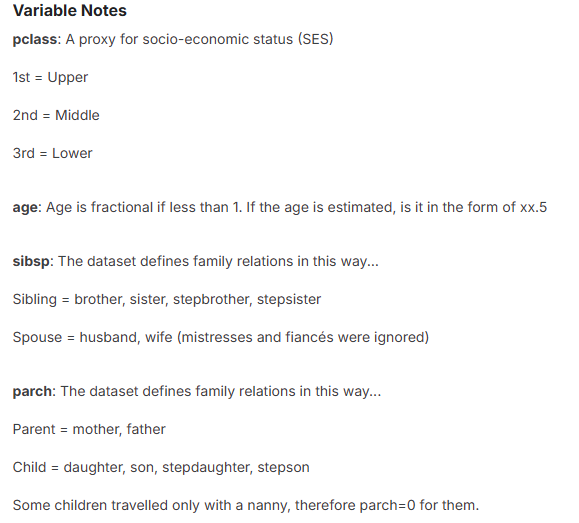

In [27]:
dimentions = titanic_df.shape
print(f'The Titanic_df has {dimentions[0]} rows and {dimentions[1]} columns.')

The Titanic_df has 891 rows and 12 columns.


In [28]:
titanic_df.info()
# The age, cabin and Embarked have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
titanic_df.notna().all()

,0
PassengerId,True
Survived,True
Pclass,True
Name,True
Sex,True
Age,False
SibSp,True
Parch,True
Ticket,True
Fare,True


In [90]:
#making a new df for age where there are no missing values.
clean_age = titanic_df['Age'].dropna()
clean_age.notna().all()

True

In [39]:
#Computing basic statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
#Here 0 = did not survive and 1 = survived
titanic_df['Survived'].value_counts().reset_index()

,Survived,count
0,0,549
1,1,342


##Data visualization

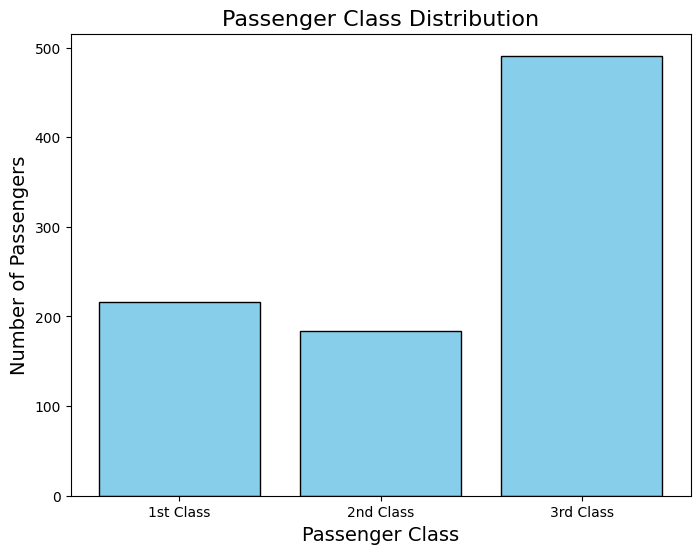

In [72]:
# How many people were in each class:

# Counting the number of passengers in each class
class_counts = titanic_df['Pclass'].value_counts()

# Sorting the counts by class
class_counts = class_counts.sort_index()

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor = 'black')

# Adding titles and labels
plt.title('Passenger Class Distribution', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks(class_counts.index, ['1st Class', '2nd Class', '3rd Class'])

# Showing the plot
plt.show()

In [73]:
#The survival rate by gender:

survival_rate_by_gender = titanic_df.groupby('Sex')['Survived'].mean()

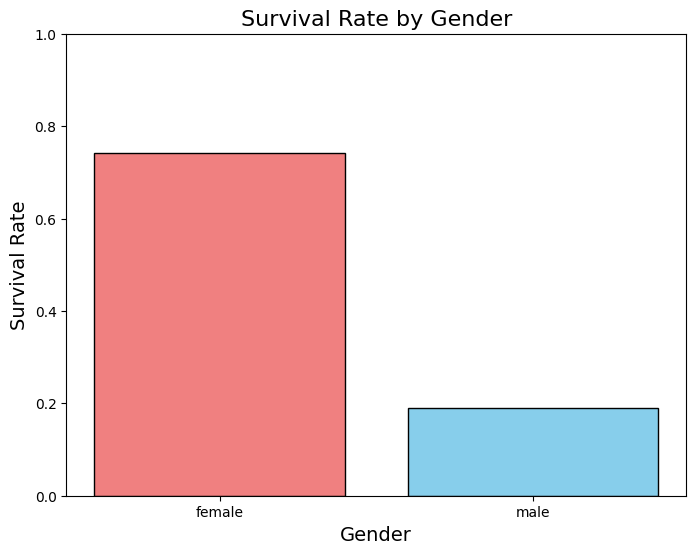

In [77]:
# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(survival_rate_by_gender.index, survival_rate_by_gender.values, color=['lightcoral', 'skyblue'], edgecolor = 'black')

# Adding titles and labels
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)  # Since survival rate is a proportion, the y-axis should be between 0 and 1

# Showing the plot
plt.show()

##I want to see if there are significant correlations between diferent numerical data. For that I use Seaborn correlation matrix.

In [85]:
# I make a data set that has only numeric values.
numeric_df = titanic_df.select_dtypes(include=['number'])
#Droping the passanger ID because it had no data value.
numeric_df=numeric_df.drop(columns=['PassengerId'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

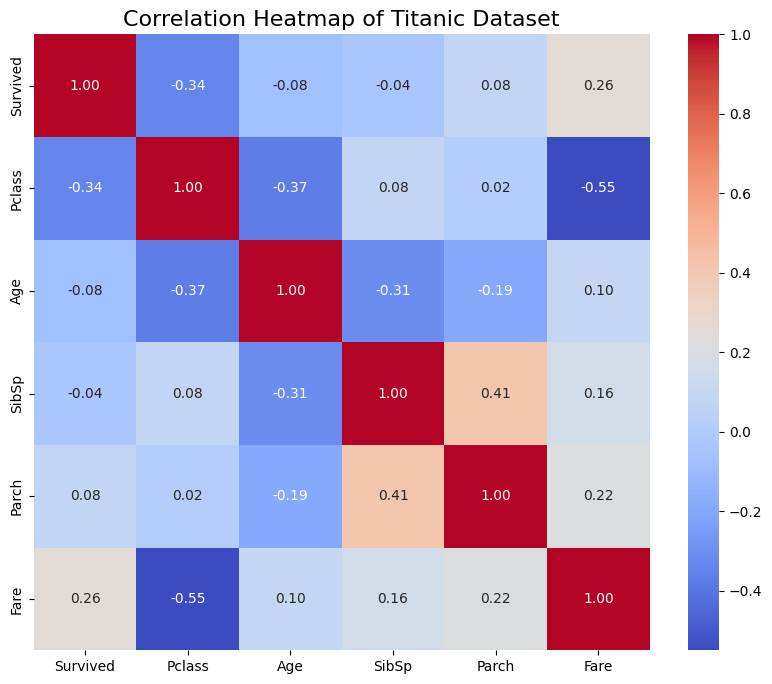

In [86]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add titles and labels
plt.title('Correlation Heatmap of Titanic Dataset', fontsize=16)

# Show the plot
plt.show()


## From the correlation matrix I can see a moderately strong  negative relationship between the passanger class and fare. Which in means that the higher the fare the lower the class variable. In this case passanger classes ar divided as followig:
##1st = Upper

##2nd = Middle

##3rd = Lower

## From this I can conclude that higher fare means better (higher accomodation) passanger class.


## I noticed a negative correlation between a passengers age and their class. The correlation is not strong but made me wan to analyse it more. For that I made a boxplot of the two variables.
## It is important to remeber the class division where the lower number shows better accomodation (nr 1 = upper class, 2 = middle and 3 =lower)

<ipython-input-87-98ecf5091cd2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='Set3')


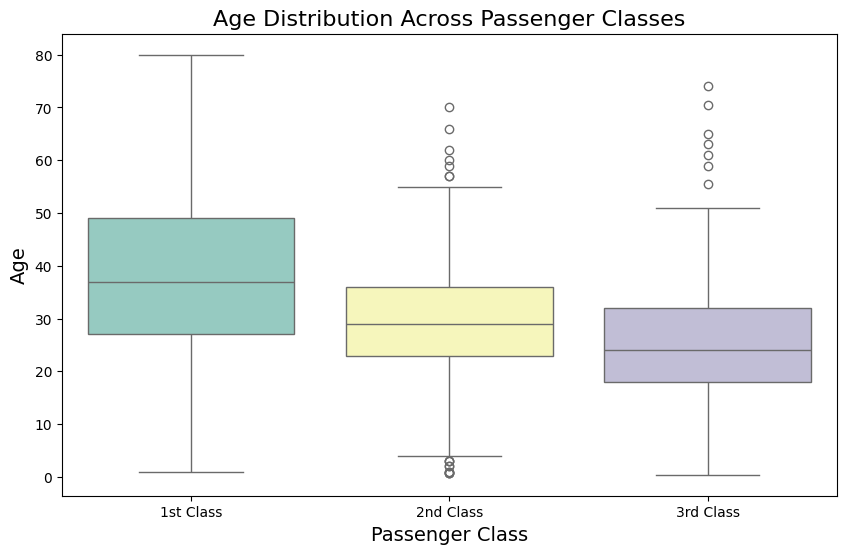

In [87]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='Set3')

# Add titles and labels
plt.title('Age Distribution Across Passenger Classes', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])

# Show the plot
plt.show()